# Code from 
## https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/ 

In [2]:
import pandas as pd

from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA, ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

In [3]:
# loading the data
folder = 'C:/Users/Lorenzo/Desktop/MyStuff/Master/Paris/Bloom/data/'

count_ig_csv = folder + 'emerging_risks_doc_count_instagram.csv'
count_tw_csv = folder + 'emerging_risks_doc_count_twitter.csv'

engagement_fb_csv = folder + 'emerging_risks_local_engagement_facebook.csv'
engagement_ig_csv = folder + 'emerging_risks_local_engagement_instagram.csv'
engagement_tw_csv = folder + 'emerging_risks_local_engagement_twitter.csv'

files = [count_ig_csv, count_tw_csv, engagement_fb_csv, engagement_ig_csv, engagement_tw_csv]

dfs = {'count_ig_csv': pd.read_csv(count_ig_csv),
       'count_tw_csv': pd.read_csv(count_tw_csv), 
       'engagement_fb_csv': pd.read_csv(engagement_fb_csv), 
       'engagement_ig_csv': pd.read_csv(engagement_ig_csv),
       'engagement_tw_csv': pd.read_csv(engagement_tw_csv)}

In [4]:
df = dfs['count_tw_csv']
data = df.Pesticides

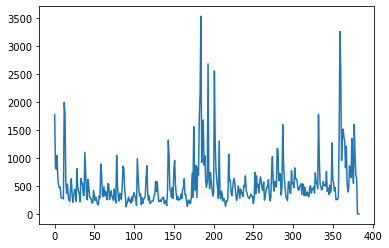

In [5]:
data.plot()

In [6]:
data[380:]

380    641.0
381      0.0
382      0.0
383      0.0
Name: Pesticides, dtype: float64

In [7]:
# remove last 3 values as they are 0, likely by error
data = data[:381]
train, test = data[:190], data[190:]

## AR example
The method is suitable for univariate time series without trend and seasonal components.

C:\Users\Lorenzo\miniconda3\envs\Prophet\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, Fu

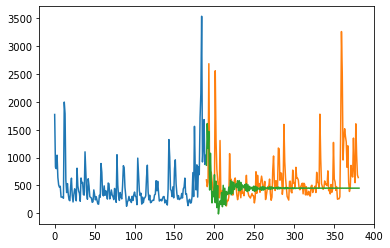

In [13]:
# fit model
ar_model = AR(train)
ar_model_fit = ar_model.fit()
# make prediction
yhat = ar_model_fit.predict(190, 190+len(test))
train.plot()
test.plot()
yhat.plot()

# MA example
The method is suitable for univariate time series without trend and seasonal components.

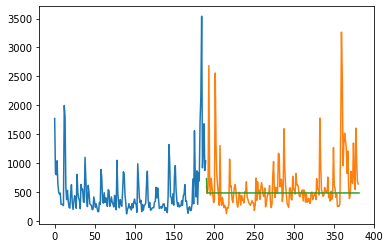

In [14]:
# specify parameters: AR=0, MA=1
ma_model = ARMA(train, order=(0, 1))
ma_model_fit = ma_model.fit(disp=False)
# make prediction
yhat = ma_model_fit.predict(190, 190+len(test))
train.plot()
test.plot()
yhat.plot()

In [15]:
ma_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Pesticides   No. Observations:                  190
Model:                     ARMA(0, 1)   Log Likelihood               -1389.925
Method:                       css-mle   S.D. of innovations            363.500
Date:                Mon, 27 Apr 2020   AIC                           2785.849
Time:                        12:46:32   BIC                           2795.590
Sample:                             0   HQIC                          2789.795
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              487.1412     38.857     12.537      0.000     410.982     563.300
ma.L1.Pesticides     0.4759      0.058      8.273      0.000       0.363       0.589
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -2.1013           +0.0000j            2.1013            0.5000
-----------------------------------------------------------------------------
"""

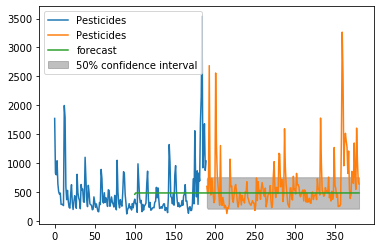

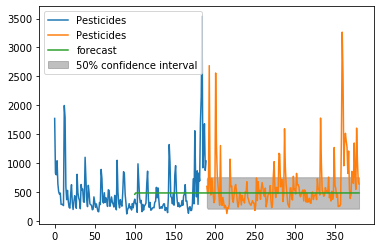

In [10]:
t = train.plot()
te = test.plot()
ma_model_fit.plot_predict(start=100, end=380, dynamic=True, plot_insample=False, ax=t, alpha=0.5)

# ARMA example
The method is suitable for univariate time series without trend and seasonal components.

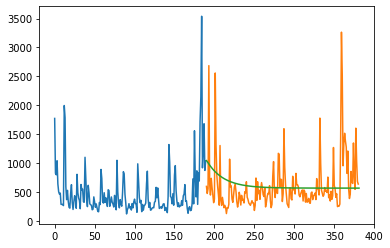

In [16]:
# fit model
arma_model = ARMA(train, order=(3, 1))
arma_model_fit = arma_model.fit(disp=False)
# make prediction
yhat = arma_model_fit.predict(190, 190+len(test))
train.plot()
test.plot()
yhat.plot()

In [17]:
arma_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Pesticides   No. Observations:                  190
Model:                     ARMA(3, 1)   Log Likelihood               -1379.420
Method:                       css-mle   S.D. of innovations            343.578
Date:                Mon, 27 Apr 2020   AIC                           2770.841
Time:                        12:47:13   BIC                           2790.323
Sample:                             0   HQIC                          2778.733
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              570.4797    160.165      3.562      0.000     256.562     884.397
ar.L1.Pesticides     1.3553      0.147      9.204      0.000       1.067       1.644
ar.L2.Pesticides    -0.4202      0.133     -3.161      0.002      -0.681      -0.160
ar.L3.Pesticides     0.0348      0.085      0.407      0.684      -0.132       0.202
ma.L1.Pesticides    -0.8384      0.129     -6.478      0.000      -1.092      -0.585
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0500           +0.0000j            1.0500            0.0000
AR.2            3.7669           +0.0000j            3.7669            0.0000
AR.3            7.2744           +0.0000j            7.2744            0.0000
MA.1            1.1928           +0.0000j            1.1928            0.0000
-----------------------------------------------------------------------------
"""

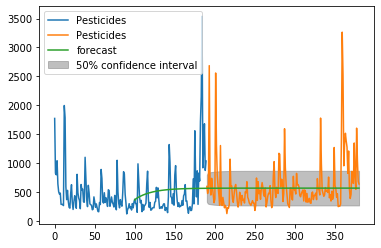

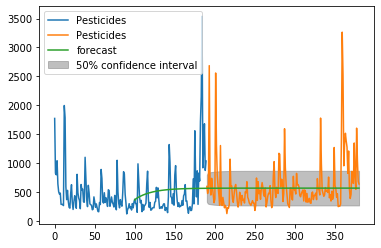

In [13]:
t = train.plot()
te = test.plot()
arma_model_fit.plot_predict(start=100, end=380, dynamic=True, plot_insample=False, ax=t, alpha=0.5)

# ARIMA example
The method is suitable for univariate time series with trend and without seasonal components.

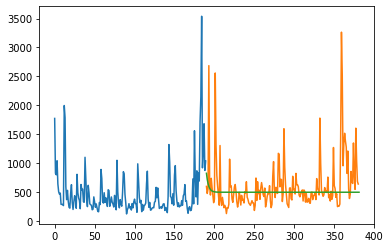

In [21]:
arima_model = ARIMA(train, order=(1, 0, 1))
arima_model_fit = arima_model.fit(disp=False)
# make prediction
yhat = arima_model_fit.predict(190, 190+len(test))
train.plot()
test.plot()
yhat.plot()

In [22]:
arima_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Pesticides   No. Observations:                  190
Model:                     ARMA(1, 1)   Log Likelihood               -1380.807
Method:                       css-mle   S.D. of innovations            346.330
Date:                Mon, 27 Apr 2020   AIC                           2769.613
Time:                        12:48:09   BIC                           2782.602
Sample:                             0   HQIC                          2774.875
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              499.5369     64.931      7.693      0.000     372.274     626.800
ar.L1.Pesticides     0.6777      0.110      6.135      0.000       0.461       0.894
ma.L1.Pesticides    -0.1629      0.153     -1.062      0.288      -0.464       0.138
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4756           +0.0000j            1.4756            0.0000
MA.1            6.1380           +0.0000j            6.1380            0.0000
-----------------------------------------------------------------------------
"""

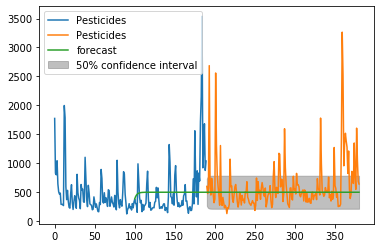

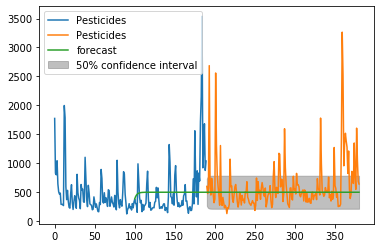

In [23]:
t = train.plot()
te = test.plot()
arima_model_fit.plot_predict(start=100, end=380, dynamic=True, plot_insample=False, ax=t, alpha=0.5)

# SARIMA example
The method is suitable for univariate time series with trend and/or seasonal components.
Not useful because we have only 1 year of data?
The notation for the model involves specifying the order for the AR(p), I(d), and MA(q) models as parameters to 
an ARIMA function and AR(P), I(D), MA(Q) and m parameters at the seasonal level, e.g.
SARIMA(p, d, q)(P, D, Q)m where “m” is the number of time steps in each season (the seasonal period).

190    1097.961119
191     917.074465
192    1009.086165
193     884.433237
194     994.966703
          ...     
377    1124.077884
378    1240.669419
379    1126.819938
380    1243.411472
381    1129.561992
Length: 192, dtype: float64


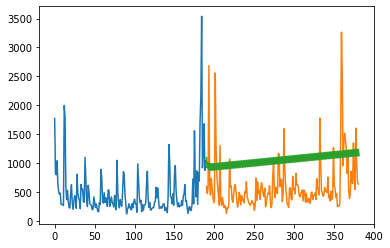

In [24]:
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 2))
sarima_model_fit = sarima_model.fit(disp=False)
# make prediction
yhat = sarima_model_fit.predict(190, 190+len(test))
train.plot()
test.plot()
yhat.plot()
print(yhat)

In [25]:
sarima_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                        Pesticides   No. Observations:                  190
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 2)   Log Likelihood               -1367.140
Date:                           Mon, 27 Apr 2020   AIC                           2744.281
Time:                                   12:48:43   BIC                           2760.436
Sample:                                        0   HQIC                          2750.827
                                           - 190                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5150      0.065      7.892      0.000       0.387       0.643
ma.L1         -0.9998      1.234     -0.810      0.418      -3.418       1.418
ar.S.L2       -0.0497      0.079     -0.632      0.528      -0.204       0.104
ma.S.L2       -0.8939      0.065    -13.785      0.000      -1.021      -0.767
sigma2      1.248e+05   1.49e+05      0.840      0.401   -1.67e+05    4.16e+05
===================================================================================
Ljung-Box (Q):                       20.91   Jarque-Bera (JB):               934.49
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.17   Skew:                             2.04
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

AttributeError: 'SARIMAXResults' object has no attribute 'plot_predict'

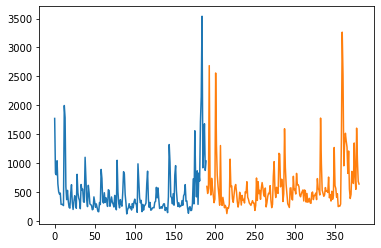

In [20]:
t = train.plot()
te = test.plot()
sarima_model_fit.plot_predict(start=100, end=380, dynamic=True, plot_insample=False, ax=t, alpha=0.5)

# Simple Exponential Smoothing (SES)
The method is suitable for univariate time series without trend and seasonal components.

C:\Users\Lorenzo\miniconda3\envs\Prophet\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


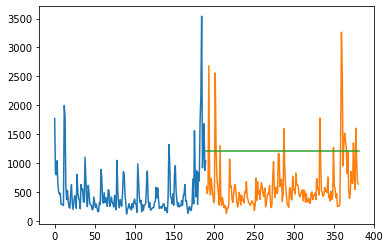

In [26]:
ses_model = SimpleExpSmoothing(train)
ses_model_fit = ses_model.fit()
# make prediction
yhat = ses_model_fit.predict(190, 190+len(test))
train.plot()
test.plot()
yhat.plot()

In [27]:
ses_model_fit.summary()

Dep. Variable:,endog,No. Observations:,190
Model:,SimpleExpSmoothing,SSE,24787635.819
Optimized:,True,AIC,2241.978
Trend:,None,BIC,2248.472
Seasonal:,None,AICC,2242.194
Seasonal Periods:,None,Date:,"Mon, 27 Apr 2020"
Box-Cox:,False,Time:,12:49:20
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.3960350,alpha,True
initial_level,1179.4548,l.0,True


AttributeError: 'HoltWintersResults' object has no attribute 'plot_predict'

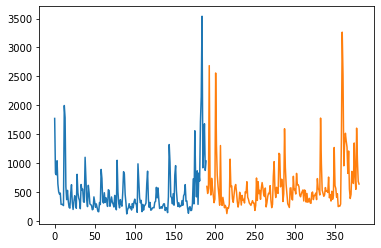

In [28]:
t = train.plot()
te = test.plot()
ses_model_fit.plot_predict(start=100, end=380, dynamic=True, plot_insample=False, ax=t, alpha=0.5)

# Holt Winter’s Exponential Smoothing (HWES)
Also called he Triple Exponential Smoothing method.
The method is suitable for univariate time series with trend and/or seasonal components.

C:\Users\Lorenzo\miniconda3\envs\Prophet\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


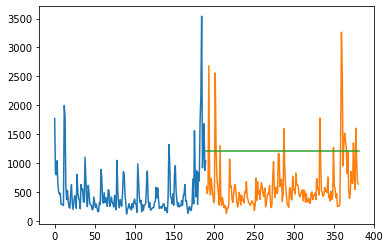

In [29]:
hwes_model = ExponentialSmoothing(train)
hwes_model_fit = hwes_model.fit()
# make prediction
yhat = hwes_model_fit.predict(len(train), len(train))
yhat = hwes_model_fit.predict(190, 190+len(test))
train.plot()
test.plot()
yhat.plot()

In [30]:
hwes_model_fit.summary()

Dep. Variable:,endog,No. Observations:,190
Model:,ExponentialSmoothing,SSE,24787635.819
Optimized:,True,AIC,2241.978
Trend:,None,BIC,2248.472
Seasonal:,None,AICC,2242.194
Seasonal Periods:,None,Date:,"Mon, 27 Apr 2020"
Box-Cox:,False,Time:,12:49:52
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.3960350,alpha,True
initial_level,1179.4548,l.0,True
